# Nanodegree Engenheiro de Machine Learning
## Aprendizado Supervisionado
## Projeto: Encontrando doadores para a *CharityML*

Seja bem-vindo ao segundo projeto do Nanodegree Engenheiro de Machine Learning! Neste notebook, você receberá alguns códigos de exemplo e será seu trabalho implementar as funcionalidades adicionais necessárias para a conclusão do projeto. As seções cujo cabeçalho começa com **'Implementação'** indicam que o bloco de código posterior requer funcionalidades adicionais que você deve desenvolver. Para cada parte do projeto serão fornecidas instruções e as diretrizes da implementação estarão marcadas no bloco de código com uma expressão `'TODO'`. 
Por favor, leia cuidadosamente as instruções!

Além de implementações de código, você terá de responder questões relacionadas ao projeto e à sua implementação. Cada seção onde você responderá uma questão terá um cabeçalho com o termo **'Questão X'**. Leia com atenção as questões e forneça respostas completas nas caixas de texto que começam com o termo **'Resposta:'**. A submissão do seu projeto será avaliada baseada nas suas resostas para cada uma das questões além das implementações que você disponibilizar.

>**Nota:** Por favor, especifique QUAL A VERSÃO DO PYTHON utilizada por você para a submissão deste notebook. As células "Code" e "Markdown" podem ser executadas utilizando o atalho do teclado **Shift + Enter**. Além disso, as células "Markdown" podem ser editadas clicando-se duas vezes na célula.


## Iniciando

Neste projeto, você utilizará diversos algoritmos de aprendizado supervisionado para modelar com precisão a remuneração de indivíduos utilizando dados coletados no censo americano de 1994. Você escolherá o algoritmo mais adequado através dos resultados preliminares e irá otimizá-lo para modelagem dos dados. O seu objetivo com esta implementação é construir um modelo que pode predizer com precisão se um indivíduo possui uma remuneração superior a $50,000. Este tipo de tarefa pode surgir em organizações sem fins lucrativos que sobrevivem de doações. Entender a remuneração de um indivíduo pode ajudar a organização o montante mais adequado para uma solicitação de doação, ou ainda se eles realmente deveriam entrar em contato com a pessoa. Enquanto pode ser uma tarefa difícil determinar a faixa de renda de uma pesssoa de maneira direta, nós podemos inferir estes valores através de outros recursos disponíveis publicamente. 

O conjunto de dados para este projeto se origina do [Repositório de Machine Learning UCI](https://archive.ics.uci.edu/ml/datasets/Census+Income) e foi cedido por Ron Kohavi e Barry Becker, após a sua publicação no artigo _"Scaling Up the Accuracy of Naive-Bayes Classifiers: A Decision-Tree Hybrid"_. Você pode encontrar o artigo de Ron Kohavi [online](https://www.aaai.org/Papers/KDD/1996/KDD96-033.pdf). Os dados que investigaremos aqui possuem algumas pequenas modificações se comparados com os dados originais, como por exemplo a remoção da funcionalidade `'fnlwgt'` e a remoção de registros inconsistentes.


----
## Explorando os dados
Execute a célula de código abaixo para carregas as bibliotecas Python necessárias e carregas os dados do censo. Perceba que a última coluna deste cojunto de dados, `'income'`, será o rótulo do nosso alvo (se um indivíduo possui remuneração igual ou maior do que $50,000 anualmente). Todas as outras colunas são dados de cada indívduo na base de dados do censo.

In [1]:
# Importe as bibliotecas necessárias para o projeto.
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Permite a utilização da função display() para DataFrames.

# Importação da biblioteca de visualização visuals.py
import visuals as vs

# Exibição amigável para notebooks
%matplotlib inline

# Carregando os dados do Censo
data = pd.read_csv("census.csv")

# Sucesso - Exibindo o primeiro registro
display(data.head(n=1))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K


### Implementação: Explorando os Dados

Uma investigação superficial da massa de dados determinará quantos indivíduos se enquadram em cada grupo e nos dirá sobre o percentual destes indivúdos com remuneração anual superior à \$50,000. No código abaixo, você precisará calcular o seguinte:
- O número total de registros, `'n_records'`
- O número de indivíduos com remuneração anual superior à \$50,000, `'n_greater_50k'`.
- O número de indivíduos com remuneração anual até \$50,000, `'n_at_most_50k'`.
- O percentual de indivíduos com remuneração anual superior à \$50,000, `'greater_percent'`.

** DICA: ** Você pode precisar olhar a tabela acima para entender como os registros da coluna `'income'` estão formatados.

In [2]:
# Número total de registros.
n_records = data.shape[0]

# Número de registros com remuneração anual superior à $50,000
n_greater_50k = data[data['income'] == '>50K'].shape[0]

# O número de registros com remuneração anual até $50,000
n_at_most_50k = data[data['income'] == '<=50K'].shape[0]

# O percentual de indivíduos com remuneração anual superior à $50,000
greater_percent = n_greater_50k/float(n_records)*100

# Exibindo os resultados
print("Total number of records: {}".format(n_records))
print("Individuals making more than $50,000: {}".format(n_greater_50k))
print("Individuals making at most $50,000: {}".format(n_at_most_50k))
print("Percentage of individuals making more than $50,000: {:.2f}%".format(greater_percent))

Total number of records: 45222
Individuals making more than $50,000: 11208
Individuals making at most $50,000: 34014
Percentage of individuals making more than $50,000: 24.78%


** Explorando as colunas **
* **age**: contínuo. 
* **workclass**: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
* **education**: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 
* **education-num**: contínuo. 
* **marital-status**: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
* **occupation**: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 
* **relationship**: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 
* **race**: Black, White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other. 
* **sex**: Female, Male. 
* **capital-gain**: contínuo. 
* **capital-loss**: contínuo. 
* **hours-per-week**: contínuo. 
* **native-country**: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

----
## Preparando os dados
Antes de que os dados possam ser utilizados como input para algoritmos de machine learning, muitas vezes eles precisam ser tratados, formatados e reestruturados — este processo é conhecido como **pré-processamento**. Felizmente neste conjunto de dados não existem registros inconsistentes para tratamento, porém algumas colunas precisam ser ajustadas. Este pré-processamento pode ajudar muito com o resultado e poder de predição de quase todos os algoritmos de aprendizado.

### Transformando os principais desvios das colunas contínuas
Um conjunto de dados pode conter ao menos uma coluna onde os valores tendem a se próximar para um único número, mas também podem conter registros com o mesmo atributo contendo um valor muito maior ou muito menor do que esta tendência. Algoritmos podem ser sensíveis para estes casos de distribuição de valores e este fator pode prejudicar sua performance se a distribuição não estiver normalizada de maneira adequada. Com o conjunto de dados do censo, dois atributos se encaixam nesta descrição: '`capital-gain'` e `'capital-loss'`.

Execute o código da célula abaixo para plotar um histograma destes dois atributos. Repare na distribuição destes valores.

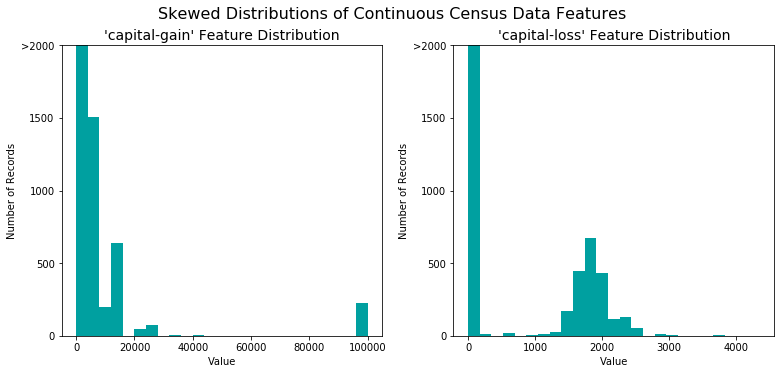

In [3]:
# Dividindo os dados entre features e coluna alvo
income_raw = data['income']
features_raw = data.drop('income', axis = 1)

# Visualizando os principais desvios das colunas contínuas entre os dados
vs.distribution(data)

Para atributos com distribuição muito distorcida, tais como `'capital-gain'` e `'capital-loss'`, é uma prática comum aplicar uma <a href="https://en.wikipedia.org/wiki/Data_transformation_(statistics)">transformação logarítmica</a> nos dados para que os valores muito grandes e muito pequenos não afetem a performance do algoritmo de aprendizado. Usar a transformação logarítmica reduz significativamente os limites dos valores afetados pelos outliers (valores muito grandes ou muito pequenos). Deve-se tomar cuidado ao aplicar esta transformação, poir o logaritmo de `0` é indefinido, portanto temos que incrementar os valores em uma pequena quantia acima de `0` para aplicar o logaritmo adequadamente.

Execute o código da célula abaixo para realizar a transformação nos dados e visualizar os resultados. De novo, note os valores limite e como os valores estão distribuídos.

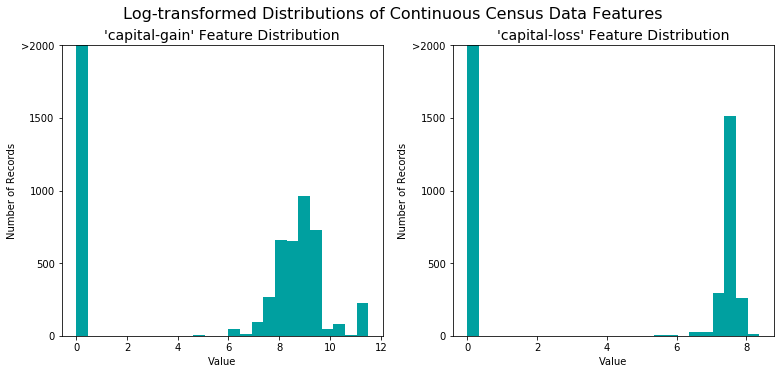

In [4]:
# Aplicando a transformação de log nos registros distorcidos.
skewed = ['capital-gain', 'capital-loss']
features_log_transformed = pd.DataFrame(data = features_raw)
features_log_transformed[skewed] = features_raw[skewed].apply(lambda x: np.log(x + 1))

# Visualizando as novas distribuições após a transformação.
vs.distribution(features_log_transformed, transformed = True)

### Normalizando atributos numéricos
Além das transformações em atributos distorcidos, é uma boa prática comum realizar algum tipo de adaptação de escala nos atributos numéricos. Ajustar a escala nos dados não modifica o formato da distribuição de cada coluna (tais como `'capital-gain'` ou `'capital-loss'` acima); no entanto, a normalização garante que cada atributo será tratado com o mesmo peso durante a aplicação de aprendizado supervisionado. Note que uma vez aplicada a escala, a observação dos dados não terá o significado original, como exemplificado abaixo.

Execute o código da célula abaixo para normalizar cada atributo numérico, nós usaremos ara isso a [`sklearn.preprocessing.MinMaxScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html).

In [5]:
# Importando sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Inicializando um aplicador de escala e aplicando em seguida aos atributos
scaler = MinMaxScaler() # default=(0, 1)
numerical = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

features_log_minmax_transform = pd.DataFrame(data = features_log_transformed)
features_log_minmax_transform[numerical] = scaler.fit_transform(features_log_transformed[numerical])

# Exibindo um exemplo de registro com a escala aplicada
display(features_log_minmax_transform.head(n=5))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.301370,State-gov,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.667492,0.0,0.397959,United-States
1,0.452055,Self-emp-not-inc,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,0.122449,United-States
2,0.287671,Private,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,0.397959,United-States
3,0.493151,Private,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,0.397959,United-States
4,0.150685,Private,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,0.397959,Cuba


### Implementação: Pré-processamento dos dados

A partir da tabela em **Explorando os dados** acima, nós podemos observar que existem diversos atributos não-numéricos para cada registro. Usualmente, algoritmos de aprendizado esperam que os inputs sejam numéricos, o que requer que os atributos não numéricos (chamados de *variáveis de categoria*) sejam convertidos. Uma maneira popular de converter as variáveis de categoria é utilizar a estratégia **one-hot encoding**. Esta estratégia cria uma variável para cada categoria possível de cada atributo não numérico. Por exemplo, assuma que `algumAtributo` possuí três valores possíveis: `A`, `B`, ou `C`. Nós então transformamos este atributo em três novos atributos: `algumAtributo_A`, `algumAtributo_B` e `algumAtributo_C`.


|   | algumAtributo |                    | algumAtributo_A | algumAtributo_B | algumAtributo_C |
| :-: | :-: |                            | :-: | :-: | :-: |
| 0 |  B  |  | 0 | 1 | 0 |
| 1 |  C  | ----> one-hot encode ----> | 0 | 0 | 1 |
| 2 |  A  |  | 1 | 0 | 0 |

Além disso, assim como os atributos não-numéricos, precisaremos converter a coluna alvo não-numérica, `'income'`, para valores numéricos para que o algoritmo de aprendizado funcione. Uma vez que só existem duas categorias possíveis para esta coluna ("<=50K" e ">50K"), nós podemos evitar a utilização do one-hot encoding e simplesmente transformar estas duas categorias para `0` e `1`, respectivamente. No trecho de código abaixo, você precisará implementar o seguinte:
 - Utilizar [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) para realizar o one-hot encoding nos dados da `'features_log_minmax_transform'`.
 - Converter a coluna alvo `'income_raw'` para re.
   - Transforme os registros com "<=50K" para `0` e os registros com ">50K" para `1`.

In [6]:
# Utilize o one-hot encoding nos dados em 'features_log_minmax_transform' utilizando pandas.get_dummies()
features_final = pd.get_dummies(features_raw)

# Faça o encode da coluna 'income_raw' para valores numéricos
income = income_raw.apply(lambda x: 0 if x == "<=50K" else 1)

# Exiba o número de colunas depois do one-hot encoding
encoded = list(features_final.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))

# Descomente a linha abaixo para ver as colunas após o encode
#print(encoded)

103 total features after one-hot encoding.
['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_level_ 10th', 'education_level_ 11th', 'education_level_ 12th', 'education_level_ 1st-4th', 'education_level_ 5th-6th', 'education_level_ 7th-8th', 'education_level_ 9th', 'education_level_ Assoc-acdm', 'education_level_ Assoc-voc', 'education_level_ Bachelors', 'education_level_ Doctorate', 'education_level_ HS-grad', 'education_level_ Masters', 'education_level_ Preschool', 'education_level_ Prof-school', 'education_level_ Some-college', 'marital-status_ Divorced', 'marital-status_ Married-AF-spouse', 'marital-status_ Married-civ-spouse', 'marital-status_ Married-spouse-absent', 'marital-status_ Never-married', 'marital-status_ Separated', 'marital-status_ Widowed', 'occupation_ A

### Embaralhar e dividir os dados
Agora todas as _variáveis de categoria_ foram convertidas em atributos numéricos e todos os atributos numéricos foram normalizados. Como sempre, nós agora dividiremos os dados entre conjuntos de treinamento e de teste. 80% dos dados serão utilizados para treinamento e 20% para teste.

Execute o código da célula abaixo para realizar divisão.

**Alteração realizada**: para que a proporção nos datasets seja preservada, devemos fazer uma amostragem estratificada. Em `'train_test_split'`, isto pode ser feito inserindo-se o parâmetro `'stratify=y_all'`. Desta forma, a apresentação de resultados será mais consistente com a realidade e teremos maior confiança sobre a influência de parâmetros no modelo final. A amostragem continua sendo aleatória, no entanto com a proporção de classes preservada.

In [7]:
# Importar train_test_split
from sklearn.model_selection import train_test_split

# Dividir os 'atributos' e 'income' entre conjuntos de treinamento e de testes.
X_train, X_test, y_train, y_test = train_test_split(features_final, 
                                                    income,
                                                    stratify=income,
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 36177 samples.
Testing set has 9045 samples.


----
## Avaliando a performance do modelo
Nesta seção nós investigaremos quatro algoritmos diferentes e determinaremos qual deles é melhor para a modelagem dos dados. Três destes algoritmos serão algoritmos de aprendizado supervisionado de sua escolha e o quarto algoritmo é conhecido como *naive predictor*.

### Métricas e o Naive predictor

*CharityML*, equpada com sua pesquisa, sabe que os indivíduos que fazem mais do que \$50,000 possuem maior probabilidade de doar para a sua campanha de caridade. Por conta disto, a *CharityML* está particularmente interessada em predizer com acurácia quais indivíduos possuem remuneração acima de \$50,000. Parece uqe utilizar **acurácia (accuracy)** como uma métrica para avaliar a performance de um modelo é um parâmetro adequado. Além disso, identificar alguém que *não possui* remuneração acima de \$50,000 como alguém que recebe acima deste valor seria ruim para a *CharityML*, uma vez que eles estão procurando por indivíduos que desejam doar. Com isso, a habilidade do modelo em predizer com preisão aqueles que possuem a remuneração acima dos \$50,000 é *mais importante* do que a habilidade de realizar o **recall** destes indivíduos. Nós podemos utilizar a fórmula **F-beta score** como uma métrica que considera ambos: precision e recall.


$$ F_{\beta} = (1 + \beta^2) \cdot \frac{precision \cdot recall}{\left( \beta^2 \cdot precision \right) + recall} $$

Em particular, quando $\beta = 0.5$, maior ênfase é atribuída para a variável precision. Isso é chamado de **F$_{0.5}$ score** (ou F-score, simplificando).

Analisando a distribuição de classes (aqueles que possuem remuneração até \$50,000 e aqueles que possuem remuneração superior), fica claro que a maioria dos indivíduos não possui remuneração acima de \$50,000. Isto pode ter grande impacto na **acurácia (accuracy)**, uma vez que nós poderíamos simplesmente dizer *"Esta pessoa não possui remuneração acima de \$50,000"* e estar certos em boa parte das vezes, sem ao menos olhar os dados! Fazer este tipo de afirmação seria chamado de **naive**, uma vez que não consideramos nenhuma informação para balisar este argumento. É sempre importante considerar a *naive prediction* para seu conjunto de dados, para ajudar a estabelecer um benchmark para análise da performance dos modelos. Com isso, sabemos que utilizar a naive prediction não traria resultado algum: Se a predição apontasse que todas as pessoas possuem remuneração inferior à \$50,000, a *CharityML* não identificaria ninguém como potencial doador. 



#### Nota: Revisando: accuracy, precision e recall

** Accuracy ** mede com que frequência o classificador faz a predição correta. É a proporção entre o número de predições corretas e o número total de predições (o número de registros testados).

** Precision ** informa qual a proporção de mensagens classificamos como spam eram realmente spam. Ou seja, é a proporção de verdadeiros positivos (mensagens classificadas como spam que eram realmente spam) sobre todos os positivos (todas as palavras classificadas como spam, independente se a classificação estava correta), em outras palavras, é a proporção

`[Verdadeiros positivos/(Verdadeiros positivos + Falso positivos)]`

** Recall(sensibilidade)** nos informa qual a proporção das mensagens que eram spam que foram corretamente classificadas como spam. É a proporção entre os verdadeiros positivos (classificados como spam, que realmente eram spam) sobre todas as palavras que realmente eram spam. Em outras palavras, é a proporção entre

`[Verdadeiros positivos/(Verdadeiros positivos + Falso negativos)]`

Para problemas de classificação distorcidos em suas distribuições, como no nosso caso, por exemplo, se tivéssemos 100 mensagems de texto e apenas 2 fossem spam e todas as outras não fossem, a "accuracy" por si só não seria uma métrica tão boa. Nós poderiamos classificar 90 mensagems como "não-spam" (incluindo as 2 que eram spam mas que teriam sido classificadas como não-spam e, por tanto, seriam falso negativas.) e 10 mensagems como spam (todas as 10 falso positivas) e ainda assim teriamos uma boa pontuação de accuracy. Para estess casos, precision e recall são muito úteis. Estas duas métricas podem ser combinadas para resgatar o F1 score, que é calculado através da média(harmônica) dos valores de precision e de recall. Este score pode variar entre 0 e 1, sendo 1 o melhor resultado possível para o F1 score (consideramos a média harmônica pois estamos lidando com proporções).

In [8]:
'''
TP = np.sum(income) # Contando pois este é o caso "naive". Note que 'income' são os dados 'income_raw' convertidos
para valores numéricos durante o passo de pré-processamento de dados.
FP = income.count() - TP # Específico para o caso naive

TN = 0 # Sem predições negativas para o caso naive
FN = 0 # Sem predições negativas para o caso naive
'''
# Calcular accuracy, precision e recall
accuracy = greater_percent/100 # TP/total
recall = n_greater_50k/(n_greater_50k + 0) # TP/(TP+FN)
precision = n_greater_50k/(n_greater_50k + n_at_most_50k) # TP/(TP+FP)

# Calcular o F-score utilizando a fórmula acima para o beta = 0.5 e os valores corretos de precision e recall.
beta = 0.5
fscore = ((1+beta*beta)*(precision*recall)) / (beta*beta*precision + recall)

# Exibir os resultados 
print("Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore))

Naive Predictor: [Accuracy score: 0.2478, F-score: 0.2917]


### Questão 1 - Performance do Naive Predictor
* Se escolhessemos um modelo que sempre prediz que um indivíduo possui remuneração acima de $50,000, qual seria a accuracy e o F-score considerando este conjunto de dados? Você deverá utilizar o código da célula abaixo e atribuir os seus resultados para as variáveis `'accuracy'` e `'fscore'` que serão usadas posteriormente.

** Por favor, note ** que o propósito ao gerar um naive predictor é simplesmente exibir como um modelo sem nenhuma inteligência se comportaria. No mundo real, idealmente o seu modelo de base será o resultado de um modelo anterior ou poderia ser baseado em um paper no qual você se basearia para melhorar. Quando não houver qualquer benchmark de modelo, utilizar um naive predictor será melhor do que uma escolha aleatória.

** DICA: ** 

* Quando temos um modelo que sempre prediz '1' (e.x o indivíduo possui remuneração superior à 50k) então nosso modelo não terá Verdadeiros Negativos ou Falso Negativos, pois nós não estaremos afirmando que qualquer dos valores é negativo (ou '0') durante a predição. Com isso, nossa accuracy neste caso se torna o mesmo valor da precision (Verdadeiros positivos/ (Verdadeiros positivos + Falso positivos)) pois cada predição que fizemos com o valor '1' que deveria ter o valor '0' se torna um falso positivo; nosso denominador neste caso é o número total de registros.
* Nossa pontuação de Recall(Verdadeiros positivos/(Verdadeiros Positivos + Falsos negativos)) será 1 pois não teremos Falsos negativos.

**Resposta: ** obtivemos os seguintes valores para o `Naive Predictor: [Accuracy score: 0.2478, F-score: 0.2917]`

###  Modelos de Aprendizado Supervisionado
**Estes são alguns dos modelos de aprendizado supervisionado disponíveis em** [`scikit-learn`](http://scikit-learn.org/stable/supervised_learning.html)
- Gaussian Naive Bayes (GaussianNB)
- Decision Trees (Árvores de decisão)
- Ensemble Methods (Bagging, AdaBoost, Random Forest, Gradient Boosting)
- K-Nearest Neighbors (KNeighbors)
- Stochastic Gradient Descent Classifier (SGDC)
- Support Vector Machines (SVM)
- Logistic Regression

### Questão 2 - Aplicação do Modelo
Liste três dos modelos de aprendizado supervisionado acima que são apropriados para este problema que você irá testar nos dados do censo. Para cada modelo escolhido

- Descreva uma situação do mundo real onde este modelo pode ser utilizado. 
- Quais são as vantagems da utilização deste modelo; quando ele performa bem?
- Quais são as fraquesas do modelo; quando ele performa mal?
- O que torna este modelo um bom candidato para o problema, considerando o que você sabe sobre o conjunto de dados?

** DICA: **

Estruture sua resposta no mesmo formato acima^, com 4 partes para cada um dos modelos que você escolher. Por favor, inclua referências em cada uma das respostas.

<img src="ml_map.png"/>

**Resposta: **Para lidar com o problema de **classificação**, os seguintes modelos são apropriados:Regressão Logística, Naive Bayes e SVM.

### **Regressão Logística**
- **Aplicação: **É um dos modelos mais simples de classificação, e funciona muito bem quando os dados são *linearmente separáveis*. Uma aplicação desse modelo é na classificação de alunos a serem aceitos ou não em uma universidade baseados em suas notas, por exemplo. Também pode ser usado em diversas aplicações médicas de diagnóstico e curiosamente prever medidas de segurança para minas de carvão.
- **Vantagens: **
    - As saídas têm uma boa interpretação probabilística e o algoritmo pode ser ajustado para evitar o overfitting; 
    - Os modelos logísticos podem ser atualizados facilmente com novos dados usando Método do gradiente estocástico (SGDC); 
    - Simples, funciona muito bem quando os dados são linearmente separáveis.
    
    
- **Desvantagens: **
    - O conjunto de dados do problema precisa ser linearmente separável; 
    - A regressão logística tende a ter uma performance inferior quando existem limites de decisão múltiplos ou não-lineares; 
    - Eles não são flexíveis o suficiente para capturar naturalmente relacionamentos mais complexos.
    
    
- **O que faz ele um bom candidado para o problema, baseado nos dados: **A aplicação desse modelo para o problema é bastante promissora pois a Regressão Logística se aplica para problemas como o desse projeto (que inclusive se parece com o exemplificado), embora não dê para saber se os dados são linearmente separáveis. Isso somente será possível de avaliar durante os testes a seguir. Além disso, inspirando-se no princípio da *Navalha de Occam*, é bom começar com poucas premissas e com um modelo bem básico como referência para depois avaliar modelos mais complexos.

<img src="logistic.png" width="35%"/>

### **Gaussian Naive Bayes (GaussianNB)**
- **Aplicação: **É um algoritmo muito simples em torno de probabilidade condicional e contagem. Basicamente é uma tabela de probabilidade, que se assemelha estruturalmente a uma Árvode de Decisão, atualizada com o treinamento. o Naive (que significa `"ingênuo"`) pois considera *independência dos dados* (dos atributos) o que raramente ocorre no mundo real. Esse modelo é bastante eficiente e utilizado em classificação de documentos (especialmente em classificação de SPAM, como é usado pelo Google no GMail), classificação de textos (como notícias que o usuário possa gostar em seu feed e *trend topics*), a sugestão de autocompletar em textos, como teclados de celular e *sentimental analysis* (de Tweets, por exemplo, identificando expressões negativas e positivas em textos). Assim como a Regressão Logística, tem sucesso em algumas aplicações médicas (prever doenças) e biológicas.
- **Vantagens: **
    - Funciona bem para Datasets com muitos atributos e quando os dados são categóricos;
    - É um algoritmo muito rápido para treinamento;
    - Como precisa de poucos parâmetros, é menos suscetível à overfitting;
    - Separa bem o ruído nos dados.
    
    
- **Desvantagens: **
    - Ele precisa de um Dataset moderado para treinamento;
    - Os atributos precisam ser independentes entre si;
    
    
- **O que faz ele um bom candidado para o problema, baseado nos dados: **Como o Dataset possui muitos atributos, e um número bom de dados, parece ser interessante usar o Naive Bayes, até porque para verificar se é um bom modelo exigirá pouco esforço computacional. No entanto, não é possível saber se todas os atributos são independentes entre si, o que poderá ser verificado apenas com o resultado final da modelagem, comparando-se o score com os demais modelos.

### **Máquinas de Vetores de Suporte (SVM)**
- **Aplicação: **Esse modelo utiliza kernels, que aprendem a diferenciar duas categorias de dados com base em similaridades de exemplos passados, determinando uma borda de decisão que maximiza a distancia entre os membros mais próximos das categorias. Os exemplos de uso são parecidos com os da Regressão Logística, mas agora sem a restrição dos dados serem linearmente separáveis. São usados portanto em reconhecimento de escrita (mais do que Redes Neurais), reconhecimento facial, e classificação de imagens. Além disso, pode ser usado para prever dinâmicas de mercados e previsões financeiras.  
- **Vantagens: **
    - Consegue lidar com dados não-lineares;
    - Não é necessário tomar premissas sobre o relacionamento entre os dados (como Regressão Logística e Naive Bayes o fazem);
    - Geralmente resulta em modelos com melhor classificação de valores futuros;
    - Possui diversos kernels;
    - Bastante robusto contra overfitting, especialmente em espaços multi-dimensionais;
    
    
- **Desvantagens: **
    - Computacionalmente, exige bastante memória;
    - Exige uma certa habilidade em escolher o melhor kernel para modelar a solução do probblema;
    - Não escala muito bem bara grandes bases de dados;
    - É mais utilizado como um classificador binário (que é como ele funciona melhor). Não funciona bem para problemas multi-classe;
    - Atualmente, na indústria, tem-se preferido utilizar Random Forest ao invés de SVM.
    
    
- **O que faz ele um bom candidado para o problema, baseado nos dados: **Como o nosso problema é binário, o Dataset é de volume moderado, e não temos certeza se a Regressão Linear funcionará (ou seja, é uma alternativa boa se os dados não forem linearmente separáveis), o uso do SVM é interessante para esse problema. No entanto, escolher o melhor kernel deverá ser um ponto de atenção. O SGDC (*Stochastic Gradient Descent Classifier*) segue raciocínio similar.

<img src="svm.png" width="35%"/>

No entanto, segue uma análise dos demais métodos.

### **Árvores de Decisão (e suas variações: Gradient/Decision boosting, Random/Decision Forest )**
- **Aplicação: **Também conhecidas como *Árvores de Classificação*, é um modelo bastante intuitivo graficamente ou programáticamente (através de *if-then statements*). Funciona muito bem quando os dados podem ser bem divididos a cada camada de decisão. Uma aplicação desse modelo é em que partido um eleitor vai votar, baseada em suas características como idade, sexo, classe social, etc. Ou, da mesma forma, é um excelente classificador para prever se um usuário vai assinar ou não um plano pago (*user signup*) de algum serviço ou até mesmo o funil/pipeline que o leva a tomar essa ação. Também pode ser utilizado para ranking, como no Netflix. Tem sido utilizado também com sucesso em problemas de reconhecimento de voz através de otimização e pruning de árvores. Tem aplicações também em sensoriamento remoto.
- **Vantagens: **
    - Devido à sua estrutura natural, escala bem e lida muito bem com dados não-lineares;
    - Rápido de treinar e de visualizar o resultado e robusta a erros;
    - Lida bem com dados categóricos e numéricos;
    - Não é necessário tomar premissas sobre o relacionamento entre os dados (como Regressão Logística e Naive Bayes o fazem).
    
- **Desvantagens: **
    - Podem crescer muito rápido de estrutura com Datasets grandes, causando overfitting (o que pode ser aliviado pelos métodos de *ensemble*);
    - Geralmente resulta em modelos menos generalizados;
    - Também usa bastante memória;
    
    
- **O que faz ele um bom candidado para o problema, baseado nos dados: **Esse modelo, também simples, consegue lidar com dados que não são linearmente separáveis e categóricos. Além disso, existem muitos atributos cujos valores podem ser interpretados como "0/1" ou "não/sim", o que é perfeito para esse método. No entanto, ainda é uma dúvida se pelo tamanho do Dataset poderá resultar em um overfit ou ser serão necessárias técnicas de *ensemble* para contornar esse possível problema e ajudar a prever as amostras mais difíceis. 

<img src="tree.png" width="35%"/>

### **Deep Learning (Redes Neurais)**
- **Aplicação: **Inspirado no funcionamento do cérebro humano, esse clasificador de muitas maneiras faz a ponte entre o aprendizado de máquina e a ciência cognitiva, sendo bastante conveniente para classificação. Como principal aplicação do Deep Learning (utilizando MLP - *Multi Layer Perceptron* conectados por `"sinapses"`) temos o reconhecimento de imagens e de audio, principalmente com o aumento da capacidade de processamento de dados atual, bem como reconhecimento de movimento (andar, percurso de carros autônomos, voos de autônomos), também aplicações médicas, e até tradução de textos (Google Translator).
- **Vantagens: **
    - Possui muitos parâmetros se comparados aos outros métodos, o que lhe confere bastante versatilidade;
    - Possui alta escalabilidade;
    - Eficiente no uso de memória.
    
    
- **Desvantagens: **
    - Pode tomar muito tempo e recursos computacionais para treinamento (para evitar *extremos locais* e outras situações típicas desse modelo);
    - Precisa de bastante dados para treinamento;
    - É uma caixa preta, ou seja, difícil de visualizar a estrutura final de uma rede neural;
    - Alto nível de complexidade na modelagem.
    
    
- **O que faz ele um bom candidado para o problema, baseado nos dados: **Para esse problema, acho que iríamos cair em uma situação de `"Matar uma mosca com uma bazooka"`. Apesar de ser interessante usar uma Rede Neural para resolver esse problema, acredito que ele possa ser resolvido com métodos mais simples.

<img src="nn.png" width="35%"/>

### **K-Nearest Neighbors (K-NN)**
- **Aplicação: **É uma classe de algoritmos especializados, denominada de *instance-based*, quando o problema exige uma objetivo bastante específico  ou uma *clusterização* do conjunto de dados, e utiliza funções que calculam similaridade dos dados com base em uma medida de *distância* entre eles. Geralmente é utilizada em aprendizagem não supervisionada, mas no campo da aprendizagem supervisionada uma aplicação bastante interessante para o K-NN é a detecção de anomalias nos dados (ou no modelo de agrupamento deles), como por exemplo detecção de fraudes e outras vulnerabilidades de segurança.
- **Vantagens: **
    - Consegue lidar com funções numericamente complexas;
    - Útil quando o dado é difícil/caro de se obter, pois ao longo do processo de escala do modelo, pode-se revelar que dados são úteis ou não de se coletar.
    
    
- **Desvantagens: **
    - Usam intensivamente a memória (muitas vezes até Bancos de Dados - *instance-based*);
    - Requer todos os dados treinamento para realizar a previsão;
    - Encontrar as funções de distância pode ser computacionalmente intensivo.
    

- **O que faz ele um bom candidado para o problema, baseado nos dados: **No problema em questão até poderia ser utilizado para clusterizar o Dataset e encontrar a função de distância. No entanto, acredito que seja também uma situação de `"Matar uma mosca com uma bazooka"`.

<img src="knn.png" width="35%"/>

>Modern Machine Learning Algorithms: Strengths and Weaknesses, URL: https://elitedatascience.com/machine-learning-algorithms#classification

>Machine Learning Algorithms for Business Applications – Complete Guide, URL: https://www.techemergence.com/machine-learning-algorithms-for-business-applications-complete-guide/

>How to choose algorithms for Microsoft Azure Machine Learning, URL: https://docs.microsoft.com/en-us/azure/machine-learning/studio/algorithm-choice

>Complete Guide to Parameter Tuning in XGBoost (with codes in Python), URL: https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/

>Xgboost, URL: https://en.wikipedia.org/wiki/Xgboost

>Machine Learning, do Vale do Silício ao Brasil, URL: https://www.youtube.com/watch?v=AJdoVmhAxUk&feature=youtu.be&t=1h37m28s

>Installing XGBoost on Mac OSX, URL: https://www.ibm.com/developerworks/community/blogs/jfp/entry/Installing_XGBoost_on_Mac_OSX?lang=en

>XGBoost Installation Guide, URL: http://xgboost.readthedocs.io/en/latest/build.html#python-package-installation

>How to Develop Your First XGBoost Model in Python with scikit-learn, URL: https://machinelearningmastery.com/develop-first-xgboost-model-python-scikit-learn/

### Implementação - Criando um Pipeline de Treinamento e Predição
Para avaliar adequadamente a performance de cada um dos modelos que você escolheu é importante que você crie um pipeline de treinamento e predição que te permite de maneira rápida e eficiente treinar os modelos utilizando vários tamanhos de conjuntos de dados para treinamento, além de performar predições nos dados de teste. Sua implementação aqui será utilizada na próxima seção. No bloco de código abaixo, você precisará implementar o seguinte:
 - Importar `fbeta_score` e `accuracy_score` de [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics).
 - Adapte o algoritmo para os dados de treinamento e registre o tempo de treinamento. 
 - Realize predições nos dados de teste `X_test`, e também nos 300 primeiros pontos de treinamento `X_train[:300]`.
   - Registre o tempo total de predição. 
 - Calcule a acurácia tanto para o conjundo de dados de treino quanto para o conjunto de testes.
 - Calcule o F-score para os dois conjuntos de dados: treino e testes. 
   - Garanta que você configurou o parâmetro `beta`! 

In [9]:
# Import two metrics from sklearn - fbeta_score and accuracy_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import fbeta_score

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    # Fit the learner to the training data using slicing with 'sample_size' using .fit(training_features[:], training_labels[:])
    start = time() # Get start time
    learner = learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time() # Get end time
    
    # Calculate the training time
    results['train_time'] = end - start
        
    # Get the predictions on the test set(X_test),
    # then get predictions on the first 300 training samples(X_train) using .predict()
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    end = time() # Get end time
    
    # Calculate the total prediction time
    results['pred_time'] = end - start
            
    # Compute accuracy on the first 300 training samples which is y_train[:300]
    results['acc_train'] = accuracy_score(y_train[:300], predictions_train)
        
    # Compute accuracy on test set using accuracy_score()
    results['acc_test'] = accuracy_score(y_test, predictions_test)
    
    # Compute F-score on the the first 300 training samples using fbeta_score()
    results['f_train'] = fbeta_score(y_train[:300], predictions_train, beta=0.5)
        
    # Compute F-score on the test set which is y_test
    results['f_test'] = fbeta_score(y_test, predictions_test, beta=0.5)
    
    # Success
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
        
    # Return the results
    return results

### Implementação: Validação inicial do modelo
No código da célular, você precisará implementar o seguinte:
- Importar os três modelos de aprendizado supervisionado que você escolheu na seção anterior 
- Inicializar os três modelos e armazená-los em `'clf_A'`, `'clf_B'`, e `'clf_C'`. 
  - Utilize um `'random_state'` para cada modelo que você utilizar, caso seja fornecido.
  - **Nota:** Utilize as configurações padrão para cada modelo - você otimizará um modelo específico em uma seção posterior
- Calcule o número de registros equivalentes à 1%, 10%, e 100% dos dados de treinamento.
  - Armazene estes valores em `'samples_1'`, `'samples_10'`, e `'samples_100'` respectivamente.

**Nota:** Dependendo do algoritmo de sua escolha, a implementação abaixo pode demorar algum tempo para executar!

**Alteração realizada**: foi necessário alterar o nome da função `visuals.evaluate` para `visuals.evaluate_plot` para corrigir um erro que estava sendo gerado pelo arquivo original no Python 3.*

LogisticRegression trained on 361 samples.
LogisticRegression trained on 3617 samples.
LogisticRegression trained on 36177 samples.
GaussianNB trained on 361 samples.
GaussianNB trained on 3617 samples.
GaussianNB trained on 36177 samples.


/Users/macbuck/venv/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


SVC trained on 361 samples.
SVC trained on 3617 samples.
SVC trained on 36177 samples.


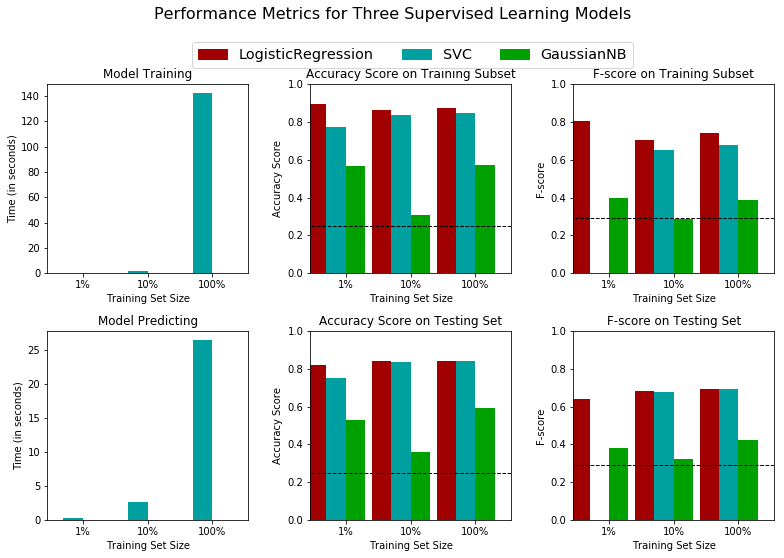

In [11]:
# Importe os três modelos de aprendizado supervisionado da sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Inicialize os três modelos
clf_A = LogisticRegression()
clf_B = GaussianNB()
clf_C = SVC()

# Calcule o número de amostras para 1%, 10%, e 100% dos dados de treinamento
# HINT: samples_100 é todo o conjunto de treinamento e.x.: len(y_train)
# HINT: samples_10 é 10% de samples_100
# HINT: samples_1 é 1% de samples_100
samples_100 = X_train.shape[0]
samples_10 = int(.1*X_train.shape[0])
samples_1 = int(.01*X_train.shape[0])

# Colete os resultados dos algoritmos de aprendizado
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)

# Run metrics visualization for the three supervised learning models chosen
vs.evaluate_plot(results, accuracy, fscore)

----
## Melhorando os resultados
Nesta seção final, você irá escolher o melhor entre os três modelos de aprendizado supervisionado para utilizar nos dados dos estudantes. Você irá então realizar uma busca grid para otimização em todo o conjunto de dados de treino (`X_train` e `y_train`) fazendo o tuning de pelo menos um parâmetro para melhorar o F-score anterior do modelo.

### Questão 3 - Escolhendo o melhor modelo

* Baseado na validação anterior, em um ou dois parágrafos explique para a *CharityML* qual dos três modelos você acredita ser o mais apropriado para a tarefa de identificar indivíduos com remuneração anual superior à \$50,000.  

** DICA: ** 
Analise o gráfico do canto inferior esquerdo da célula acima(a visualização criada através do comando `vs.evaluate(results, accuracy, fscore)`) e verifique o F score para o conjunto de testes quando 100% do conjunto de treino é utilizado. Qual modelo possui o maior score? Sua resposta deve abranger os seguintes pontos:
* métricas - F score no conjunto de testes quando 100% dos dados de treino são utilizados, 
* tempo de predição/treinamento 
* a adequação do algoritmo para este cojunto de dados.

In [12]:
#Printing out the values
for i in results.items():
    print(i[0])
    display(pd.DataFrame(i[1]).rename(columns={0:'1%', 1:'10%', 2:'100%'}))

LogisticRegression


,1%,10%,100%
acc_test,0.820122,0.838695,0.841791
acc_train,0.896667,0.863333,0.876667
f_test,0.640586,0.681865,0.691186
f_train,0.803571,0.707237,0.740132
pred_time,0.036284,0.007690,0.006454
train_time,0.020490,0.032592,0.512739


SVC


,1%,10%,100%
acc_test,0.752128,0.833941,0.841349
acc_train,0.773333,0.840000,0.850000
f_test,0.000000,0.679131,0.694040
f_train,0.000000,0.653846,0.678571
pred_time,0.295736,2.610976,26.551529
train_time,0.032147,1.459044,141.920902


GaussianNB


,1%,10%,100%
acc_test,0.530017,0.356993,0.594030
acc_train,0.570000,0.310000,0.573333
f_test,0.380323,0.319645,0.421005
f_train,0.397196,0.288793,0.390244
pred_time,0.041225,0.030765,0.030297
train_time,0.002746,0.019337,0.127844


**Resposta: ** Baseados nos experimentos executados, o melhor modelo para a CharityML é a **Regressão Logística**. Isso porque tanto o f1 score de treino quanto o de teste se mostraram superiores aos demais modelos testados. Esse resultado também indica que os dados são linearmente separáveis, e um modelo como a Regressão Logística se mostrou adequado para resolver o problema.

### Questão 4 - Descrevendo o modelo nos termos de Layman
 
* Em um ou dois parágrafos, explique para a *CharityML*, nos termos de layman, como o modelo final escolhido deveria funcionar. Garanta que você está descrevendo as principais vantagens do modelo, tais como o modo de treinar o modelo e como o modelo realiza a predição. Evite a utilização de jargões matemáticos avançados, como por exemplo a descrição de equações. 

** DICA: **

Quando estiver explicando seu modelo, cite as fontes externas utilizadas, caso utilize alguma.

**Resposta: ** - a Regressão Logística é um dos modelos mais simples de classificação, e funciona muito bem quando os dados são *linearmente separáveis*. Uma aplicação desse modelo é na classificação de alunos a serem aceitos ou não em uma universidade baseados em suas notas, por exemplo.

<img src="logistic.png" width="35%"/>

No nosso exemplo, esses dois grupos podem ser pensados como o grupo daqueles que possuem remuneração acima de 50,000.00 e aqueles que não. O algoritmo de Regresão Logística (classificador na variável `'clf'`), então, buscou encontrar uma uma borda de decisão (acima representada pela curva) que separasse os grupos da forma mais generalizada possível.

Assim, para avaliar se uma pessoa ganha mais de 50,000.00, basta entrar com o vetor que representa as características dessa pessoa (X) e utilizar a função `clf.predict(X)` e verificar qual o resultado produzido: `"0"` ele pertence ao grupo daqueles que ganham menos que 50,000.00 `"1"` ele pertence ao grupo daqueles que ganham mais.

### Implementação: Tuning do modelo
Refine o modelo escolhido. Utilize uma busca grid (`GridSearchCV`) com pleo menos um parâmetro importante refinado com pelo menos 3 valores diferentes. Você precisará utilizar todo o conjunto de treinamento para isso. Na célula de código abaixo, você precisará implementar o seguinte:
- Importar [`sklearn.grid_search.GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) e [`sklearn.metrics.make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Inicializar o classificador escolhido por você e armazená-lo em `clf`.
 - Configurar um `random_state` se houver um disponível para o mesmo estado que você configurou anteriormente.
- Criar um dicionário dos parâmetros que você quer otimizar para o modelo escolhido.
 - Exemplo: `parâmetro = {'parâmetro' : [lista de valores]}`.
 - **Nota:** Evite otimizar o parâmetro `max_features` se este parâmetro estiver disponível! 
- Utilize `make_scorer` para criar um objeto de pontuação `fbeta_score` (com $\beta = 0.5$).
- Realize a busca gride no classificador `clf` utilizando o `'scorer'` e armazene-o na variável `grid_obj`.   
- Adeque o objeto da busca grid aos dados de treino (`X_train`, `y_train`) e armazene em `grid_fit`.

**Nota:** Dependendo do algoritmo escolhido e da lista de parâmetros, a implementação a seguir pode levar algum tempo para executar! 

In [18]:
# Importar 'GridSearchCV', 'make_scorer', e qualquer biblioteca necessária
from sklearn.metrics import make_scorer
from sklearn.grid_search import GridSearchCV

# Inicializar o classificador
clf = LogisticRegression()

# Criar a lista de parâmetros que você quer otimizar, utilizando um dicionário, caso necessário.
# HINT: parameters = {'parameter_1': [value1, value2], 'parameter_2': [value1, value2]}
parameters = [{
    'C': [1, 5, 10],
    'class_weight': [None, 'balanced'],
    'solver' : ['liblinear', 'sag', 'saga']
}]

# Criar um objeto fbeta_score utilizando make_scorer()
scorer = make_scorer(fbeta_score, beta=0.5)

# Realizar uma busca grid no classificador utilizando o 'scorer' como o método de score no GridSearchCV() 
grid_obj = GridSearchCV(clf, parameters, scoring=scorer, verbose=5)

# Adequar o objeto da busca grid como os dados para treinamento e encontrar os parâmetros ótimos utilizando fit() 
grid_fit = grid_obj.fit(X_train, y_train)

# Recuperar o estimador
best_clf = grid_fit.best_estimator_

# Realizar predições utilizando o modelo não otimizado e modelar
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Reportar os scores de antes e de depois
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))

Fitting 3 folds for each of 30 candidates, totalling 90 fits
[CV] solver=newton-cg, class_weight=None, C=1 ........................
[CV]  solver=newton-cg, class_weight=None, C=1, score=0.689880 -   2.4s
[CV] solver=newton-cg, class_weight=None, C=1 ........................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.4s remaining:    0.0s


[CV]  solver=newton-cg, class_weight=None, C=1, score=0.687934 -   1.8s
[CV] solver=newton-cg, class_weight=None, C=1 ........................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.2s remaining:    0.0s


[CV]  solver=newton-cg, class_weight=None, C=1, score=0.686714 -   1.9s
[CV] solver=lbfgs, class_weight=None, C=1 ............................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    6.1s remaining:    0.0s


[CV] ... solver=lbfgs, class_weight=None, C=1, score=0.690606 -   0.7s
[CV] solver=lbfgs, class_weight=None, C=1 ............................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    6.8s remaining:    0.0s


[CV] ... solver=lbfgs, class_weight=None, C=1, score=0.687661 -   0.8s
[CV] solver=lbfgs, class_weight=None, C=1 ............................
[CV] ... solver=lbfgs, class_weight=None, C=1, score=0.687284 -   0.6s
[CV] solver=liblinear, class_weight=None, C=1 ........................
[CV]  solver=liblinear, class_weight=None, C=1, score=0.689880 -   0.3s
[CV] solver=liblinear, class_weight=None, C=1 ........................
[CV]  solver=liblinear, class_weight=None, C=1, score=0.687661 -   0.3s
[CV] solver=liblinear, class_weight=None, C=1 ........................
[CV]  solver=liblinear, class_weight=None, C=1, score=0.687107 -   0.3s
[CV] solver=sag, class_weight=None, C=1 ..............................
[CV] ..... solver=sag, class_weight=None, C=1, score=0.689880 -   2.4s
[CV] solver=sag, class_weight=None, C=1 ..............................
[CV] ..... solver=sag, class_weight=None, C=1, score=0.687934 -   2.4s
[CV] solver=sag, class_weight=None, C=1 ..............................
[CV

/Users/macbuck/venv/lib/python3.5/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] .... solver=saga, class_weight=None, C=1, score=0.689880 -   5.3s
[CV] solver=saga, class_weight=None, C=1 .............................


/Users/macbuck/venv/lib/python3.5/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] .... solver=saga, class_weight=None, C=1, score=0.687934 -   5.4s
[CV] solver=saga, class_weight=None, C=1 .............................


/Users/macbuck/venv/lib/python3.5/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] .... solver=saga, class_weight=None, C=1, score=0.686714 -   5.4s
[CV] solver=newton-cg, class_weight=balanced, C=1 ....................
[CV]  solver=newton-cg, class_weight=balanced, C=1, score=0.606447 -   2.0s
[CV] solver=newton-cg, class_weight=balanced, C=1 ....................
[CV]  solver=newton-cg, class_weight=balanced, C=1, score=0.606449 -   2.2s
[CV] solver=newton-cg, class_weight=balanced, C=1 ....................
[CV]  solver=newton-cg, class_weight=balanced, C=1, score=0.611046 -   1.6s
[CV] solver=lbfgs, class_weight=balanced, C=1 ........................
[CV]  solver=lbfgs, class_weight=balanced, C=1, score=0.607038 -   0.7s
[CV] solver=lbfgs, class_weight=balanced, C=1 ........................
[CV]  solver=lbfgs, class_weight=balanced, C=1, score=0.606090 -   0.7s
[CV] solver=lbfgs, class_weight=balanced, C=1 ........................
[CV]  solver=lbfgs, class_weight=balanced, C=1, score=0.610551 -   0.7s
[CV] solver=liblinear, class_weight=balanced, C=1 .........

/Users/macbuck/venv/lib/python3.5/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  solver=saga, class_weight=balanced, C=1, score=0.606447 -   5.7s
[CV] solver=saga, class_weight=balanced, C=1 .........................


/Users/macbuck/venv/lib/python3.5/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  solver=saga, class_weight=balanced, C=1, score=0.606449 -   6.2s
[CV] solver=saga, class_weight=balanced, C=1 .........................


/Users/macbuck/venv/lib/python3.5/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  solver=saga, class_weight=balanced, C=1, score=0.611046 -   5.9s
[CV] solver=newton-cg, class_weight=None, C=5 ........................
[CV]  solver=newton-cg, class_weight=None, C=5, score=0.690024 -   2.8s
[CV] solver=newton-cg, class_weight=None, C=5 ........................
[CV]  solver=newton-cg, class_weight=None, C=5, score=0.686358 -   3.2s
[CV] solver=newton-cg, class_weight=None, C=5 ........................
[CV]  solver=newton-cg, class_weight=None, C=5, score=0.687206 -   3.0s
[CV] solver=lbfgs, class_weight=None, C=5 ............................
[CV] ... solver=lbfgs, class_weight=None, C=5, score=0.690656 -   0.8s
[CV] solver=lbfgs, class_weight=None, C=5 ............................
[CV] ... solver=lbfgs, class_weight=None, C=5, score=0.685756 -   0.8s
[CV] solver=lbfgs, class_weight=None, C=5 ............................
[CV] ... solver=lbfgs, class_weight=None, C=5, score=0.686736 -   0.7s
[CV] solver=liblinear, class_weight=None, C=5 ........................
[CV

/Users/macbuck/venv/lib/python3.5/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ..... solver=sag, class_weight=None, C=5, score=0.690024 -   7.3s
[CV] solver=sag, class_weight=None, C=5 ..............................


/Users/macbuck/venv/lib/python3.5/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ..... solver=sag, class_weight=None, C=5, score=0.686358 -   5.1s
[CV] solver=sag, class_weight=None, C=5 ..............................


/Users/macbuck/venv/lib/python3.5/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ..... solver=sag, class_weight=None, C=5, score=0.687206 -   5.2s
[CV] solver=saga, class_weight=None, C=5 .............................


/Users/macbuck/venv/lib/python3.5/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] .... solver=saga, class_weight=None, C=5, score=0.690024 -   5.4s
[CV] solver=saga, class_weight=None, C=5 .............................


/Users/macbuck/venv/lib/python3.5/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] .... solver=saga, class_weight=None, C=5, score=0.686358 -   5.3s
[CV] solver=saga, class_weight=None, C=5 .............................


/Users/macbuck/venv/lib/python3.5/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] .... solver=saga, class_weight=None, C=5, score=0.687206 -   5.6s
[CV] solver=newton-cg, class_weight=balanced, C=5 ....................
[CV]  solver=newton-cg, class_weight=balanced, C=5, score=0.606177 -   2.3s
[CV] solver=newton-cg, class_weight=balanced, C=5 ....................
[CV]  solver=newton-cg, class_weight=balanced, C=5, score=0.607009 -   2.3s
[CV] solver=newton-cg, class_weight=balanced, C=5 ....................
[CV]  solver=newton-cg, class_weight=balanced, C=5, score=0.611133 -   3.2s
[CV] solver=lbfgs, class_weight=balanced, C=5 ........................
[CV]  solver=lbfgs, class_weight=balanced, C=5, score=0.606418 -   1.0s
[CV] solver=lbfgs, class_weight=balanced, C=5 ........................
[CV]  solver=lbfgs, class_weight=balanced, C=5, score=0.607023 -   0.9s
[CV] solver=lbfgs, class_weight=balanced, C=5 ........................
[CV]  solver=lbfgs, class_weight=balanced, C=5, score=0.610288 -   0.7s
[CV] solver=liblinear, class_weight=balanced, C=5 .........

/Users/macbuck/venv/lib/python3.5/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] . solver=sag, class_weight=balanced, C=5, score=0.606177 -   4.9s
[CV] solver=sag, class_weight=balanced, C=5 ..........................


/Users/macbuck/venv/lib/python3.5/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] . solver=sag, class_weight=balanced, C=5, score=0.607009 -   4.8s
[CV] solver=sag, class_weight=balanced, C=5 ..........................


/Users/macbuck/venv/lib/python3.5/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] . solver=sag, class_weight=balanced, C=5, score=0.611133 -   4.9s
[CV] solver=saga, class_weight=balanced, C=5 .........................


/Users/macbuck/venv/lib/python3.5/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  solver=saga, class_weight=balanced, C=5, score=0.606177 -   5.2s
[CV] solver=saga, class_weight=balanced, C=5 .........................


/Users/macbuck/venv/lib/python3.5/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  solver=saga, class_weight=balanced, C=5, score=0.607134 -   5.0s
[CV] solver=saga, class_weight=balanced, C=5 .........................


/Users/macbuck/venv/lib/python3.5/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  solver=saga, class_weight=balanced, C=5, score=0.611258 -   6.4s
[CV] solver=newton-cg, class_weight=None, C=10 .......................
[CV]  solver=newton-cg, class_weight=None, C=10, score=0.690024 -   3.7s
[CV] solver=newton-cg, class_weight=None, C=10 .......................
[CV]  solver=newton-cg, class_weight=None, C=10, score=0.685756 -   4.0s
[CV] solver=newton-cg, class_weight=None, C=10 .......................
[CV]  solver=newton-cg, class_weight=None, C=10, score=0.687343 -   3.9s
[CV] solver=lbfgs, class_weight=None, C=10 ...........................
[CV] .. solver=lbfgs, class_weight=None, C=10, score=0.689944 -   0.8s
[CV] solver=lbfgs, class_weight=None, C=10 ...........................
[CV] .. solver=lbfgs, class_weight=None, C=10, score=0.687349 -   0.8s
[CV] solver=lbfgs, class_weight=None, C=10 ...........................
[CV] .. solver=lbfgs, class_weight=None, C=10, score=0.687559 -   0.8s
[CV] solver=liblinear, class_weight=None, C=10 .......................


/Users/macbuck/venv/lib/python3.5/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] .... solver=sag, class_weight=None, C=10, score=0.689813 -   5.4s
[CV] solver=sag, class_weight=None, C=10 .............................


/Users/macbuck/venv/lib/python3.5/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] .... solver=sag, class_weight=None, C=10, score=0.685756 -   4.7s
[CV] solver=sag, class_weight=None, C=10 .............................


/Users/macbuck/venv/lib/python3.5/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] .... solver=sag, class_weight=None, C=10, score=0.687343 -   4.6s
[CV] solver=saga, class_weight=None, C=10 ............................


/Users/macbuck/venv/lib/python3.5/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ... solver=saga, class_weight=None, C=10, score=0.689813 -   5.5s
[CV] solver=saga, class_weight=None, C=10 ............................


/Users/macbuck/venv/lib/python3.5/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ... solver=saga, class_weight=None, C=10, score=0.685756 -   5.6s
[CV] solver=saga, class_weight=None, C=10 ............................


/Users/macbuck/venv/lib/python3.5/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ... solver=saga, class_weight=None, C=10, score=0.687343 -   5.1s
[CV] solver=newton-cg, class_weight=balanced, C=10 ...................
[CV]  solver=newton-cg, class_weight=balanced, C=10, score=0.606294 -   2.6s
[CV] solver=newton-cg, class_weight=balanced, C=10 ...................
[CV]  solver=newton-cg, class_weight=balanced, C=10, score=0.606892 -   2.3s
[CV] solver=newton-cg, class_weight=balanced, C=10 ...................
[CV]  solver=newton-cg, class_weight=balanced, C=10, score=0.610768 -   2.5s
[CV] solver=lbfgs, class_weight=balanced, C=10 .......................
[CV]  solver=lbfgs, class_weight=balanced, C=10, score=0.605725 -   0.8s
[CV] solver=lbfgs, class_weight=balanced, C=10 .......................
[CV]  solver=lbfgs, class_weight=balanced, C=10, score=0.606788 -   0.8s
[CV] solver=lbfgs, class_weight=balanced, C=10 .......................
[CV]  solver=lbfgs, class_weight=balanced, C=10, score=0.610516 -   0.8s
[CV] solver=liblinear, class_weight=balanced, C=10 ..

/Users/macbuck/venv/lib/python3.5/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  solver=sag, class_weight=balanced, C=10, score=0.606294 -   4.9s
[CV] solver=sag, class_weight=balanced, C=10 .........................


/Users/macbuck/venv/lib/python3.5/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  solver=sag, class_weight=balanced, C=10, score=0.606892 -   4.9s
[CV] solver=sag, class_weight=balanced, C=10 .........................


/Users/macbuck/venv/lib/python3.5/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  solver=sag, class_weight=balanced, C=10, score=0.610768 -   5.0s
[CV] solver=saga, class_weight=balanced, C=10 ........................


/Users/macbuck/venv/lib/python3.5/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  solver=saga, class_weight=balanced, C=10, score=0.606294 -   5.7s
[CV] solver=saga, class_weight=balanced, C=10 ........................


/Users/macbuck/venv/lib/python3.5/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  solver=saga, class_weight=balanced, C=10, score=0.606892 -   6.3s
[CV] solver=saga, class_weight=balanced, C=10 ........................


/Users/macbuck/venv/lib/python3.5/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:  4.1min finished


[CV]  solver=saga, class_weight=balanced, C=10, score=0.610768 -   5.1s
Unoptimized model
------
Accuracy score on testing data: 0.8418
F-score on testing data: 0.6912

Optimized Model
------
Final accuracy score on the testing data: 0.8419
Final F-score on the testing data: 0.6915


### Questão 5 - Validação final do modelo

* Qual é a accuracy e o F-score do modelo otimizado utilizando os dados de testes?
* Estes scores são melhores ou piores do que o modelo antes da otimização? 
* Como os resultados do modelo otimizado se comparam aos benchmarks do naive predictor que você encontrou na **Questão 1**?_

**Nota:** Preencha a tabela abaixo com seus resultados e então responda as questões no campo **Resposta** 

#### Resultados:

|     Metric     | Unoptimized Model | Optimized Model | Naive Predictor |
| :------------: | :---------------: | :-------------: | :-------------: | 
| Accuracy Score |0.8418|0.8419|0.2478|
| F-score        |0.6912|0.6915|0.2917|


**Resposta: ** Os scores não apresentaram melhora significativa, indicando que o modelo da Regressão Logística não indica melhorar muito com o tuning. Isso é um indicativo de que vale a pena testar outros modelos pra ver se obtemo resultados superiores. Contudo, esses resultados são bem melhores que o Naive Predictor, como é mostrado na própria tabela.

----
## Importância dos atributos

Uma tarefa importante quando realizamos aprendizado supervisionado em um conjunto de dados como os dados do censo que estudamos aqui é determinar quais atributos fornecem maior poder de predição. Focando no relacionamento entre alguns poucos atributos mais importantes e na label alvo nós simplificamos muito o nosso entendimento do fenômeno, que é a coisa mais importante a se fazer. No caso deste projeto, isso significa que nós queremos identificar um pequeno número de atributos que possuem maior chance de predizer se um indivíduo possui renda anual superior à \$50,000.

Escolha um classificador da scikit-learn (e.x.: adaboost, random forests) que possua o atributo `feature_importance_`, que é uma função que calcula o ranking de importância dos atributos de acordo com o classificador escolhido. Na próxima célula python ajuste este classificador para o conjunto de treinamento e utilize este atributo para determinar os 5 atributos mais importantes do conjunto de dados do censo.

### Questão 6 - Observação da Relevância dos Atributos
Quando **Exploramos os dados**, vimos que existem treze atributos disponíveis para cada registro nos dados do censo. Destes treze atributos, quais os 5 atributos que você acredita que são os mais importantes para predição e em que ordem você os ranquearia? Por quê?

**Resposta:**

    1 capital-gain
    2 capital-loss
    3 education_level
    4 education_num
    5 occupation

As duas primeiras características estão intimamente relacionadas com a renda do indivíduo. O ganho de capital está em primeiro lugar porque números maiores podem nos ajudar a identificar pessoas ganhando mais. A perda de capital ainda é importante, mas porque representa perda, pode nos dar alguns falsos positivos, isto é, indivíduos que já não ganham mais de 50.000,00. Os dois seguintes são indicativos do grau de instrução. É um fato bem conhecido que existe uma correlação positiva entre níveis mais altos de educação e salões maiores. Por último, algumas ocupações são mais bem pagas do que outras e esse recurso pode nos ajudar a identificar os indivíduos que ganham mais de 50.000,00.

### Implementação - Extraindo a importância do atributo
Escolha um algoritmo de aprendizado supervisionado da `sciki-learn` que possui o atributo `feature_importance_` disponível. Este atributo é uma função que ranqueia a importância de cada atributo dos registros do conjunto de dados quando realizamos predições baseadas no algoritmo escolhido.

Na célula de código abaixo, você precisará implementar o seguinte:
 - Importar um modelo de aprendizado supervisionado da sklearn se este for diferente dos três usados anteriormente. 
 - Treinar o modelo supervisionado com todo o conjunto de treinamento.
 - Extrair a importância dos atributos utilizando `'.feature_importances_'`.


Optimized Model
------
Final accuracy score on the testing data: 0.8651
Final F-score on the testing data: 0.7457


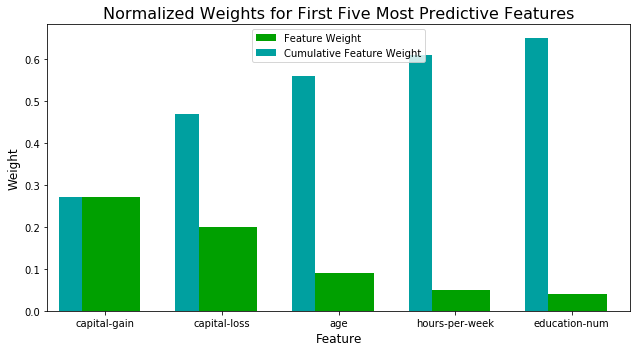

In [28]:
# Importar um modelo de aprendizado supervisionado que tenha 'feature_importances_'
from sklearn.ensemble import GradientBoostingClassifier

# Treinar o modelo utilizando o conjunto de treinamento com .fit(X_train, y_train)
# PS: fiz o GridSearchCV e já estou usando os melhores parâmetros
model = GradientBoostingClassifier(n_estimators=100, 
                                   learning_rate=1.0, 
                                   max_depth=1, 
                                   random_state=42).fit(X_train, y_train)

# Realizar predições utilizando o modelo não otimizado e modelar
best_predictions = model.predict(X_test)

# Reportar os scores de antes e de depois
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))

# Extrair a importância dos atributos utilizando .feature_importances_ 
importances = model.feature_importances_

# Plotar
vs.feature_plot(importances, X_train, y_train)

### Questão 7 - Extraindo importância dos atributos

Observe a visualização criada acima que exibe os cinco atributos mais relevantes para predizer se um indivíduo possui remuneração igual ou superior à \$50,000 por ano.

* Como estes cinco atributos se comparam com os 5 atributos que você discutiu na **Questão 6**? 
* Se você estivesse próximo da mesma resposta, como esta visualização confirma o seu raciocínio? 
* Se você não estava próximo, por que você acha que estes atributos são mais relevantes? 

**Resposta:** a visualização mostra as cinco características mais relevantes para prever se um indivíduo ganha no máximo 50.000,00, no qual três parecem ser as mesmas discutidas na questão 6. Exceto por `age` e `hours-per-week`, todas as outras parecem confirmar as características mencionadas na questão 6.

### Selecionando atributos

Como um modelo performa se nós só utilizamos um subconjunto de todos os atributos disponíveis nos dados? Com menos atributos necessários para treinar, a expectativa é que o treinamento e a predição sejam executados em um tempo muito menor — com o custo da redução nas métricas de performance. A partir da visualização acima, nós vemos que os cinco atributos mais importantes contribuem para mais de 50% da importância de **todos** os atributos presentes nos dados. Isto indica que nós podemos tentar *reduzir os atributos* e simplificar a informação necessária para o modelo aprender. O código abaixo utilizará o mesmo modelo otimizado que você encontrou anteriormente e treinará o modelo com o mesmo conjunto de dados de treinamento, porém apenas com *os cinco atributos mais importantes*

In [29]:
# Importar a funcionalidade para clonar um modelo
from sklearn.base import clone

# Reduzir a quantidade de atributos
X_train_reduced = X_train[X_train.columns.values[(np.argsort(importances)[::-1])[:5]]]
X_test_reduced = X_test[X_test.columns.values[(np.argsort(importances)[::-1])[:5]]]

# Treinar o melhor modelo encontrado com a busca grid anterior
clf = (clone(model)).fit(X_train_reduced, y_train)

# Fazer novas predições
reduced_predictions = clf.predict(X_test_reduced)

# Reportar os scores do modelo final utilizando as duas versões dos dados.
print("Final Model trained on full data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))
print("\nFinal Model trained on reduced data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, reduced_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, reduced_predictions, beta = 0.5)))

Final Model trained on full data
------
Accuracy on testing data: 0.8651
F-score on testing data: 0.7457

Final Model trained on reduced data
------
Accuracy on testing data: 0.8355
F-score on testing data: 0.6908


### Questão 8 - Efeitos da seleção de atributos

* Como o F-score do modelo final e o accuracy score do conjunto de dados reduzido utilizando apenas cinco atributos se compara aos mesmos indicadores utilizando todos os atributos? 
* Se o tempo de treinamento é uma variável importante, você consideraria utilizar os dados enxutos como seu conjunto de treinamento? 


**Resposta:** O F-score do modelo final nos dados reduzidos usando apenas cinco recursos parece ser muito menor do que os do modelo quando todos os recursos foram usados. No entanto, este não é o caso com precisão, embora a precisão também seja menor, não é muito menor que a do F-score. Considerando a precisão como métrica mais importante, considerando o tempo de treinamento como fator, podemos considerar o uso dos dados reduzidos como o conjunto de treinamento.

> **Nota**: Uma vez que você tenha concluído toda a implementação de código e respondido cada uma das questões acima, você poderá finalizar o seu trabalho exportando o iPython Notebook como um documento HTML. Você pode fazer isso utilizando o menu acima navegando para 
**File -> Download as -> HTML (.html)**. Inclua este documento junto do seu notebook como sua submissão.